# import Libraries 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# 1. Problem Statement

To predict the price of house 
with independent variable:
1)area_type:
2)availability 
3)location
4)size
5)society
6)total_sqft
7)bath
8)balcony
    
    

# 2. Exploratory Data Analysis 

In [3]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
# Data Description
print(f"There are {df.shape[0]} samples and {df.shape[1]} features. There are few features with missing values.")

There are 13320 samples and 9 features. There are few features with missing values.


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

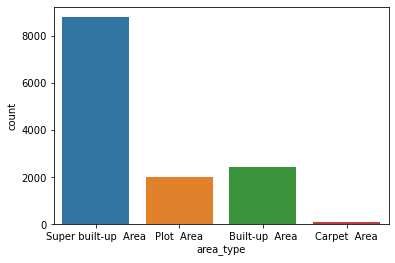

In [7]:
sns.countplot(x="area_type", data = df)

In [9]:
df["availability"].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-May    

In [8]:
df["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [13]:
df=df.drop_duplicates()

In [14]:
df["size"].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [12]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [13]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [9]:
df["total_sqft"].nunique()

2117

In [15]:
df["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

<AxesSubplot:xlabel='price'>

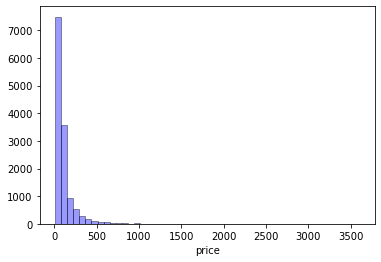

In [16]:
sns.distplot(df["price"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

# Handling Missing Values

In [15]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [16]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df["size"].fillna("2 BHK",inplace=True)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [18]:
#Adding the "bhk" feature extracted from size

df["size"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
# df["bhk"].str.rstrip("BHK")
# list=[]
# for i in df["size"]:
#     print(i.split(" ")[0])

In [20]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00


In [19]:
df[df["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3,Grare S,1600,3.0,2.0,77.0


In [21]:
df["location"] =  df["location"].replace(to_replace = np.nan, value = "Anantapura")

In [25]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [28]:
df[pd.isnull(df["bath"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,2,Asiss B,1200 - 2400,NaN,NaN,34.185
669,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,4400 - 6640,NaN,NaN,375.000
702,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,4400 - 6800,NaN,NaN,548.500
801,Super built-up Area,18-Dec,JP Nagar,4,Pehtsa,4000 - 5249,NaN,NaN,453.000
941,Super built-up Area,Ready To Move,Whitefield,4,PrOakSi,3606 - 5091,NaN,NaN,304.000
1264,Built-up Area,18-May,Hennur,3,Asoilul,2264,NaN,NaN,155.000


In [22]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df["total_sqft"].apply(fcnIsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2,Shxorm,1195 - 1440,2.0,0.0,63.770


In [26]:
df["sqft"] = df["total_sqft"].apply(fcnExtractTotalSqft)

In [24]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [25]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00


In [27]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,SoosePr,1715,3.0,3.0,112.00,1715.0
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00,1141.0


In [28]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath              73
balcony          605
price              0
sqft               0
dtype: int64

In [31]:
bhk_groupby_bathroom = df.groupby("size")["bath"].value_counts()
bhk_groupby_bathroom

size  bath
1     1.0      591
      2.0       40
2     2.0     5011
      1.0      168
      3.0       61
      4.0        4
3     3.0     2877
      2.0     1428
      4.0      287
      5.0       35
      1.0        2
      6.0        2
4     4.0      768
      5.0      263
      3.0      197
      6.0       82
      2.0       62
      8.0        2
      1.0        1
      7.0        1
5     5.0      173
      4.0       91
      6.0       33
      3.0       30
      7.0       15
      2.0        4
      8.0        1
6     6.0      116
      4.0       34
      5.0       31
      7.0       16
      3.0       12
      8.0        9
      9.0        3
7     7.0       50
      6.0       16
      5.0       13
      4.0        8
      8.0        5
      9.0        4
      3.0        2
      2.0        1
8     8.0       37
      7.0       16
      6.0       14
      4.0        6
      9.0        5
      5.0        4
      10.0       3
      12.0       3
      3.0        1
9     9.0       27
 

In [38]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["size"]].index[0]) 
    else:
        return int(row["bath"])

In [40]:
bhk_groupby_bathroom = df.groupby("size")["bath"].value_counts()
df["bath"] = df.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [41]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["size"]].index[0]) 
    else:
        return int(row["balcony"])

In [43]:
bhk_groupby_balcony = df.groupby("size")["balcony"].value_counts()
df["balcony"] = df.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)

In [45]:
df.drop(["society", "total_sqft"], inplace = True, axis=1)

In [46]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
bath            0
balcony         0
price           0
sqft            0
dtype: int64

In [47]:
df.head()

,area_type,availability,location,size,bath,balcony,price,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,2,1,51.00,1200.0


In [48]:
def fcnRelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [49]:
df["availability"] = df["availability"].apply(fcnRelabelAvailability)

# Categorized the feature into 2 buckets

In [51]:
df["location"] = df["location"].apply(lambda x: x.strip())

In [52]:
unique_location_count = df.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Whitefield               524
Sarjapur  Road           379
Electronic City          289
Kanakpura Road           249
Thanisandra              232
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [53]:
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [54]:
df["location"] = df["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [55]:
df["location"].nunique()

234

In [56]:
df["price_per_sqft"] = df["price"] * 100000 /df["sqft"]

In [57]:
df["sqft_per_bhk"] = df["sqft"] / df["size"]

In [58]:
df.head()

,area_type,availability,location,size,bath,balcony,price,sqft,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,2,1,39.07,1056.0,3699.810606,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3,120.00,2600.0,4615.384615,650.0
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3,62.00,1440.0,4305.555556,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1,95.00,1521.0,6245.890861,507.0
4,Super built-up Area,Ready To Move,Kothanur,2,2,1,51.00,1200.0,4250.000000,600.0


In [59]:
df[df["sqft_per_bhk"] < 300].count()

area_type         738
availability      738
location          738
size              738
bath              738
balcony           738
price             738
sqft              738
price_per_sqft    738
sqft_per_bhk      738
dtype: int64

In [60]:
df[df["sqft_per_bhk"] > 1500].count()

area_type         107
availability      107
location          107
size              107
bath              107
balcony           107
price             107
sqft              107
price_per_sqft    107
sqft_per_bhk      107
dtype: int64

In [61]:
df= df[~(df["sqft_per_bhk"] < 300)]
df = df[~(df["sqft_per_bhk"] > 1200)]

<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

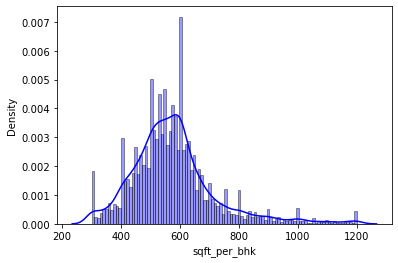

In [62]:
sns.distplot(df["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [63]:
housing_clean = df[~(df["sqft"] > 6000)]

<AxesSubplot:xlabel='sqft', ylabel='Density'>

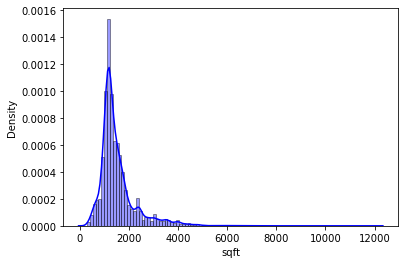

In [64]:
sns.distplot(df["sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

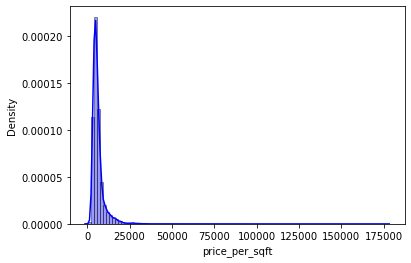

In [65]:
sns.distplot(df["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [66]:
df.sort_values(["price"], ascending=False)

,area_type,availability,location,size,bath,balcony,price,sqft,price_per_sqft,sqft_per_bhk
13067,Plot Area,Ready To Move,Other,10,13,10,3600.00,7150.0000,50349.650350,715.000000
12443,Plot Area,Ready To Move,Other,4,8,4,2600.00,4350.0000,59770.114943,1087.500000
6421,Plot Area,Soon to be Vacated,Bommenahalli,4,3,2,2250.00,2940.0000,76530.612245,735.000000
8398,Super built-up Area,Ready To Move,Bannerghatta Road,5,4,5,1400.00,2500.0000,56000.000000,500.000000
9535,Plot Area,Ready To Move,Indira Nagar,4,5,4,1250.00,2400.0000,52083.333333,600.000000
...,...,...,...,...,...,...,...,...,...,...
7482,Super built-up Area,Ready To Move,Other,1,2,1,10.00,470.0000,2127.659574,470.000000
5410,Super built-up Area,Ready To Move,Attibele,1,1,1,10.00,400.0000,2500.000000,400.000000
4113,Super built-up Area,Soon to be Vacated,BTM Layout,3,3,2,10.00,1797.5713,556.306167,599.190433
8594,Built-up Area,Ready To Move,Chandapura,1,1,1,9.00,450.0000,2000.000000,450.000000


In [67]:
df= df[~(df["price_per_sqft"] > 20000)]

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

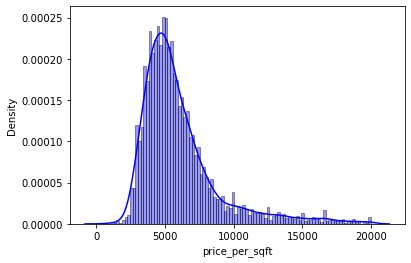

In [68]:
sns.distplot(df["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for size, size_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [69]:
df.corr()["price"].sort_values(ascending=False)

price             1.000000
price_per_sqft    0.775090
sqft              0.708528
bath              0.586491
size              0.548371
sqft_per_bhk      0.421422
balcony           0.219818
Name: price, dtype: float64

In [70]:
df["a"]

,area_type,availability,location,size,bath,balcony,price,sqft,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,2,1,39.07,1056.0,3699.810606,528.000000
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3,120.00,2600.0,4615.384615,650.000000
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3,62.00,1440.0,4305.555556,480.000000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1,95.00,1521.0,6245.890861,507.000000
4,Super built-up Area,Ready To Move,Kothanur,2,2,1,51.00,1200.0,4250.000000,600.000000
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,3,3,112.00,1715.0,6530.612245,571.666667
13315,Built-up Area,Ready To Move,Whitefield,5,4,0,231.00,3453.0,6689.834926,690.600000
13316,Super built-up Area,Ready To Move,Other,4,5,4,400.00,3600.0,11111.111111,900.000000
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2,1,60.00,1141.0,5258.545136,570.500000


In [72]:
housing_clean = df[["sqft", "size", "bath", "availability", "area_type", "location"]]

In [71]:
df["availability"].value_counts()

Ready To Move           9176
Soon to be Vacated      2524
Immediate Possession      13
Name: availability, dtype: int64

In [73]:
le1 = LabelEncoder()
housing_availability = le1.fit_transform(housing_clean.iloc[:,3])

In [74]:
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(housing_clean.iloc[:,4])

In [75]:
le3 = LabelEncoder()
housing_location = le3.fit_transform(housing_clean.iloc[:,5])

In [76]:
housing_clean

,sqft,size,bath,availability,area_type,location
0,1056.0,2,2,Soon to be Vacated,Super built-up Area,Electronic City Phase II
1,2600.0,4,5,Ready To Move,Plot Area,Chikka Tirupathi
2,1440.0,3,2,Ready To Move,Built-up Area,Uttarahalli
3,1521.0,3,3,Ready To Move,Super built-up Area,Lingadheeranahalli
4,1200.0,2,2,Ready To Move,Super built-up Area,Kothanur
...,...,...,...,...,...,...
13314,1715.0,3,3,Ready To Move,Super built-up Area,Green Glen Layout
13315,3453.0,5,4,Ready To Move,Built-up Area,Whitefield
13316,3600.0,4,5,Ready To Move,Super built-up Area,Other
13317,1141.0,2,2,Ready To Move,Built-up Area,Raja Rajeshwari Nagar


In [77]:
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)

In [78]:
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

In [79]:
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

# Preparing data for Model

In [80]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)

In [81]:
housing_num_features = housing_clean.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)

In [82]:
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

In [83]:
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)

In [84]:
housing_for_model

,sqft,size,bath,Immediate Possession,Ready To Move,Built-up Area,Carpet Area,Plot Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,-0.628851,-0.659398,-0.516111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [87]:
X, y = housing_for_model.values, df.price
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, y, test_size = 0.2, random_state = 42)

In [89]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.7268297043668781

In [91]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.7269416454915196

In [92]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7063081101153328

In [94]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.5654763560070188

In [95]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7395374103123217

In [96]:
import pickle
import json

In [97]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(rf_reg,f)

In [99]:
cat_feature_columns = {
    'availability_columns' : [col for col in le1.classes_], 
    'area_columns' : [col for col in le2.classes_],
    'location_columns' : [col for col in le3.classes_]
}

with open("columns.json","w") as f:
    f.write(json.dumps(cat_feature_columns))